In [1]:
# Delta Entropy Analysis
# Temporary checks for Alon's revised theory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import importlib
import analysis_utils
importlib.reload(analysis_utils)
from analysis_utils import extract_info_from_path, compute_roc_values


In [2]:
# Dataset paths (relative to parent directory)
wiki_paths = [
    ["../Responses/wiki_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/wiki_Falcon_clean_none_falcon-7b.csv",
     "../Responses/wiki_human_text_none_falcon-7b.csv",
     "../Responses/wiki_gpt_clean_none_falcon-7b.csv",
     "../Responses/wiki_R1_clean_none_falcon-7b.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_phi-2.csv",
     "../Responses/wiki_Falcon_clean_none_phi-2.csv",
     "../Responses/wiki_human_text_none_phi-2.csv",
     "../Responses/wiki_gpt_clean_none_phi-2.csv",
     "../Responses/wiki_R1_clean_none_phi-2.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]

news_paths = [
    ["../Responses/news_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/news_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/news_Falcon_clean_none_falcon-7b.csv",
     "../Responses/news_human_text_none_falcon-7b.csv",
     "../Responses/news_gpt_clean_none_falcon-7b.csv",
     "../Responses/news_R1_clean_none_falcon-7b.csv"],
    ["../Responses/news_Llama3.1_clean_none_phi-2.csv",
     "../Responses/news_Falcon_clean_none_phi-2.csv",
     "../Responses/news_human_text_none_phi-2.csv",
     "../Responses/news_gpt_clean_none_phi-2.csv",
     "../Responses/news_R1_clean_none_phi-2.csv"],
    ["../Responses/news_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]

abstracts_paths = [
    ["../Responses/abstracts_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/abstracts_Falcon_clean_none_falcon-7b.csv",
     "../Responses/abstracts_human_text_none_falcon-7b.csv",
     "../Responses/abstracts_gpt_clean_none_falcon-7b.csv",
     "../Responses/abstracts_R1_clean_none_falcon-7b.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_phi-2.csv",
     "../Responses/abstracts_Falcon_clean_none_phi-2.csv",
     "../Responses/abstracts_human_text_none_phi-2.csv",
     "../Responses/abstracts_gpt_clean_none_phi-2.csv",
     "../Responses/abstracts_R1_clean_none_phi-2.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]


## Δ(P) vs AUC Analysis

Checking the relation between Δ(P) = μ₁(P) - μ₀(P) (difference in mean log-perplexity) and separability (AUC).


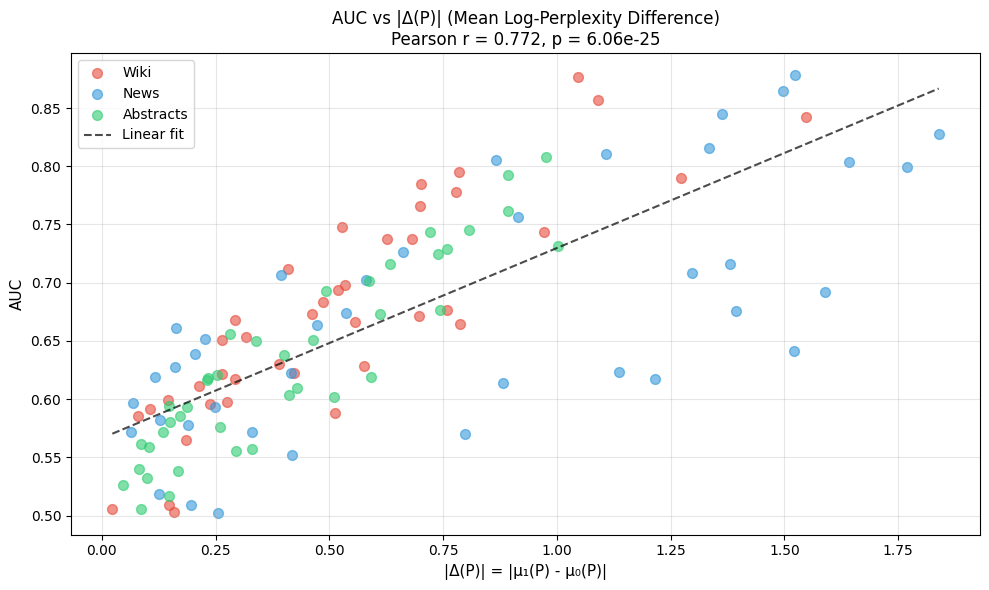


Correlation between |Δ(P)| and AUC: r = 0.772, p-value = 6.06e-25


In [3]:
def compute_auc_vs_delta(all_paths):
    """
    For each pairwise comparison, compute:
    - Δ(P) = μ₁(P) - μ₀(P) (difference in mean log-perplexity)
    - AUC for the separation
    """
    results = []
    
    for lm_paths in all_paths:
        _, _, lm_name, _ = extract_info_from_path(lm_paths[0])
        dataset_name, _, _, _ = extract_info_from_path(lm_paths[0])
        
        for i, auth1_path in enumerate(lm_paths):
            for j, auth2_path in enumerate(lm_paths):
                if i >= j:
                    continue
                
                auth1_df = pd.read_csv(auth1_path)
                auth2_df = pd.read_csv(auth2_path)
                
                mu_0 = auth1_df['response'].dropna().mean()
                mu_1 = auth2_df['response'].dropna().mean()
                delta = mu_1 - mu_0
                
                _, _, roc_auc = compute_roc_values(auth1_df, auth2_df)
                
                results.append({
                    'delta': delta,
                    'abs_delta': abs(delta),
                    'auc': roc_auc,
                    'dataset': dataset_name,
                    'lm': lm_name
                })
    
    return pd.DataFrame(results)

# Collect results from all datasets
all_dataset_paths = wiki_paths + news_paths + abstracts_paths
results_df = compute_auc_vs_delta(all_dataset_paths)

# Plot AUC vs |Δ(P)|
plt.figure(figsize=(10, 6))
colors = {'Wiki': '#e74c3c', 'News': '#3498db', 'Abstracts': '#2ecc71'}

for dataset in results_df['dataset'].unique():
    subset = results_df[results_df['dataset'] == dataset]
    plt.scatter(subset['abs_delta'], subset['auc'], 
                alpha=0.6, label=dataset, color=colors.get(dataset, 'gray'), s=50)

# Add trend line
x = results_df['abs_delta'].values
y = results_df['auc'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, p(x_line), 'k--', alpha=0.7, label='Linear fit')

# Correlation
corr, pval = pearsonr(x, y)
plt.title(f'AUC vs |Δ(P)| (Mean Log-Perplexity Difference)\nPearson r = {corr:.3f}, p = {pval:.2e}', fontsize=12)
plt.xlabel('|Δ(P)| = |μ₁(P) - μ₀(P)|', fontsize=11)
plt.ylabel('AUC', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/DeltaP_vs_AUC.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nCorrelation between |Δ(P)| and AUC: r = {corr:.3f}, p-value = {pval:.2e}")
